[268435456.0, 536870912.0, 1073741824.0, 2147483648.0, 4294967296.0, 8589934592.0, 17179869184.0, 34359738368.0]


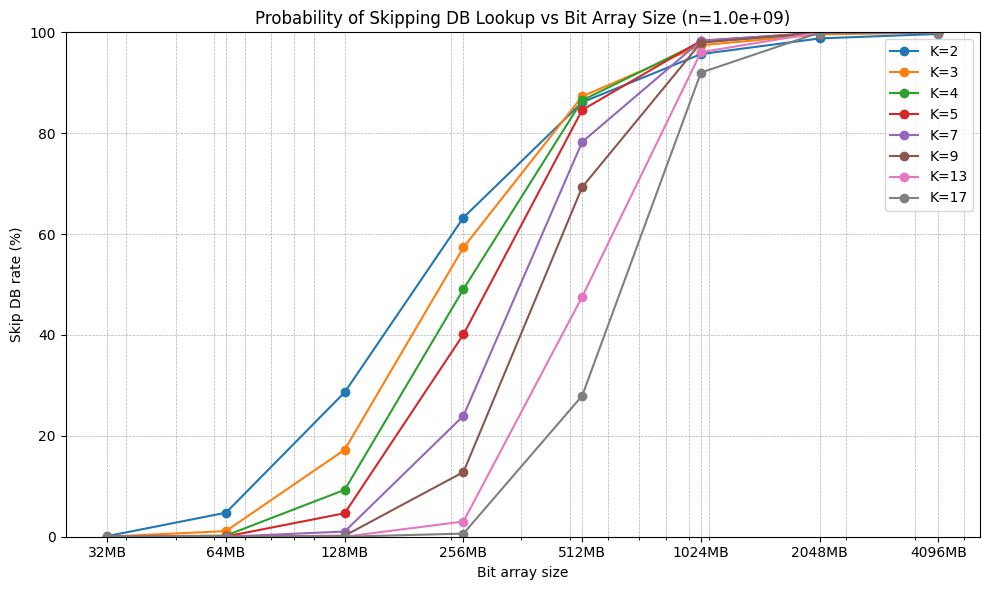

In [1]:
import matplotlib.pyplot as plt
import math

def skip_db_rate(M, K, n):
    """返回跳过数据库的概率（即没有误判的概率）"""
    """
    使用近似公式避免精度损失：
    hit_rate = (1 - filled_rate)^K ≈ e^(-K * filled_rate)
    filled_rate ≈ 1 - e^(-K * n / M)
    """
    fpr = (1 - math.exp(-K * n / M)) ** K
    return 1 - fpr  # 正确判断为“不存在”的概率

def format_bits_as_units(bits):
    kb = bits / 8 / 1024
    if kb < 1024:
        return f"{int(kb)}KB"
    else:
        return f"{kb / 1024:.0f}MB"

def plot_skip_db_rates(K_values, n, M_values):
    plt.figure(figsize=(10, 6))

    for K in K_values:
        rates = [skip_db_rate(M, K, n) * 100 for M in M_values]
        plt.plot(M_values, rates, marker='o', label=f'K={K}')

    plt.xscale('log')
    plt.xlabel('Bit array size')
    plt.ylabel('Skip DB rate (%)')
    plt.title(f'Probability of Skipping DB Lookup vs Bit Array Size (n={n:.1e})')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.ylim(0, 100)
    print(M_values)
    plt.xticks(M_values, [format_bits_as_units(m) for m in M_values])
    plt.tight_layout()
    plt.show()

# 示例调用
K_values = [2,3, 4, 5,7,9,13,17]
n = 1e9
M_values = [math.pow(2,i) for i in range(28,36)]

plot_skip_db_rates(K_values, n, M_values)

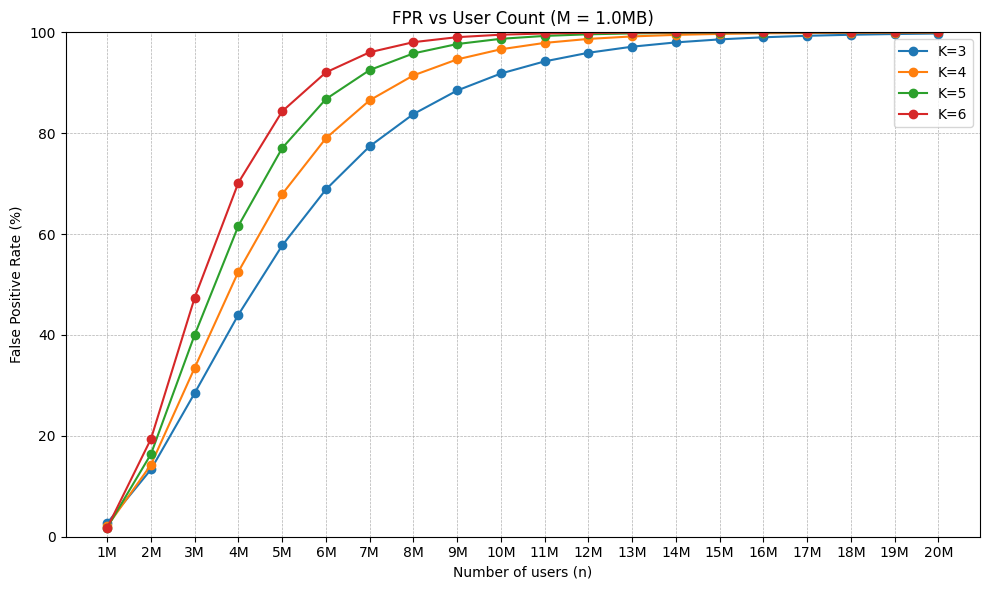

In [1]:
import matplotlib.pyplot as plt
import math

def fpr(M, K, n):
    """布隆过滤器的误判率"""
    return (1 - math.exp(-K * n / M)) ** K

def format_number(n):
    if n >= 1e9:
        return f"{n/1e9:.1f}B"
    elif n >= 1e6:
        return f"{n/1e6:.0f}M"
    else:
        return str(int(n))

def plot_fpr_vs_users(K_values, M, n_values):
    plt.figure(figsize=(10, 6))

    for K in K_values:
        rates = [fpr(M, K, n) * 100 for n in n_values]
        plt.plot(n_values, rates, marker='o', label=f'K={K}')

    # plt.xscale('log')
    plt.xlabel('Number of users (n)')
    plt.ylabel('False Positive Rate (%)')
    plt.title(f'FPR vs User Count (M = {format_bits_as_units(M)})')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.ylim(0, 100)
    plt.xticks(n_values, [format_number(n) for n in n_values])
    plt.tight_layout()
    plt.show()

def format_bits_as_units(bits):
    kb = bits / 8 / 1024
    if kb < 1024:
        return f"{int(kb)}KB"
    else:
        return f"{kb / 1024:.1f}MB"

# 示例参数
K_values = [3, 4, 5, 6]
M = 2 ** 23  # 固定空间，比如 1MB（2^23 bit）
n_values = [1e6 * i for i in range(1, 21)]  # 1w~1e

plot_fpr_vs_users(K_values, M, n_values)

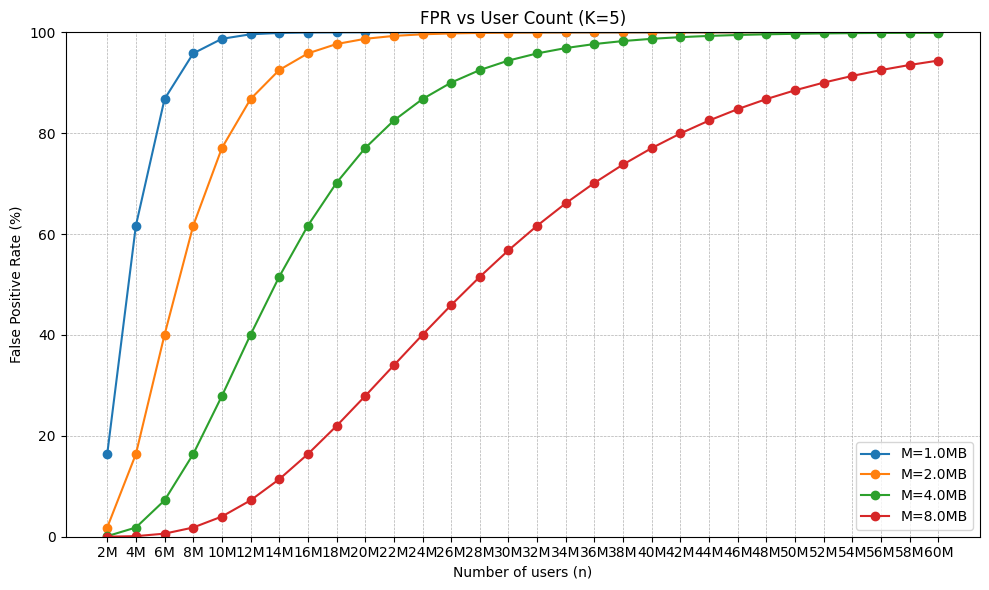

In [ ]:

def plot_fpr_vs_users(K, M_values, n_values):
    plt.figure(figsize=(10, 6))

    for M in M_values:
        rates = [fpr(M, K, n) * 100 for n in n_values]
        plt.plot(n_values, rates, marker='o', label=f'M={format_bits_as_units(M)}')

    plt.xlabel('Number of users (n)')
    plt.ylabel('False Positive Rate (%)')
    plt.title(f'FPR vs User Count (K={K})')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.ylim(0, 100)
    plt.xticks(n_values, [format_number(n) for n in n_values])
    plt.tight_layout()
    plt.show()

# 参数
K = 5
M_values = [2**i for i in range(23, 27)]  # 1MB ~ 8MB
n_values = [2e6 * i for i in range(1, 31)]  # 二百万 ~ 六千万

plot_fpr_vs_users(K, M_values, n_values)